## Import Libraries

In [88]:
import fitz
import numpy as np
import matplotlib.pyplot as plt

## Load result pdf

1. natboard-data_publicnotice_uploadedfile_file_202109284251.pdf  released by NAT as PG 2021 result

In [5]:
fname = 'natboard-data_publicnotice_uploadedfile_file_202109284251.pdf'
doc = fitz.open(fname)  # open document
out = open(fname + ".txt", "wb")  # open text output
text_list = []
for page in doc:  # iterate the document pages
    text = page.get_text().encode("utf8")  # get plain text (is in UTF-8)
    text_list.append(text)
    out.write(text)  # write text of page
    out.write(bytes((12,)))  # write page delimiter (form feed 0x0C)
out.close()


In [7]:
len(text_list)

507

## Pre-process data 

In [18]:
for i in range(len(text_list)):
    text_list[i] = text_list[i].replace("NATIONAL BOARD OF EXAMINATIONS IN MEDICAL SCIENCES\nPAGE :- "+str(i+1)+"\nRESULT OF NEET- PG 2021 **\n","")
    text_list[i] = text_list[i].replace("ROLL NO\n     SCORE\n( OUT OF 800)  ","")
    text_list[i] = text_list[i].replace("** Candidature is purely provisional subject to fulfillment of eligibility criteria as mentioned in the Information Bulletin.\n","")

In [13]:
text_list = []
for page in doc:  # iterate the document pages
    text = page.get_text()
    text_list.append(text)

## Get all marks in a list

In [79]:
numbers = []
absent_count = 0
for i in range(len(text_list)):
    l1 = text_list[i].split("\n")
    for i in range(len(l1)):
        if len(l1[i])==3:
            numbers.append(int(l1[i]))
        if l1[i]=='ABSENT':
            absent_count=absent_count+1

In [51]:

len(numbers)

160682

In [57]:
np.quantile(np.array(numbers), [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75, 0.8,0.9])

array([160., 200., 237., 272., 309., 347., 391., 415., 442., 506.])

In [40]:
numbers = dict1.values()

In [44]:
numbers = [int(x) for x in list(dict1.values()) if x not in 'ABSENT']

(array([6.0000e+00, 3.6660e+03, 2.4972e+04, 3.3057e+04, 3.2441e+04,
        2.6397e+04, 2.0584e+04, 1.3155e+04, 5.7480e+03, 6.5600e+02]),
 array([-31. ,  43.5, 118. , 192.5, 267. , 341.5, 416. , 490.5, 565. ,
        639.5, 714. ]),
 <BarContainer object of 10 artists>)

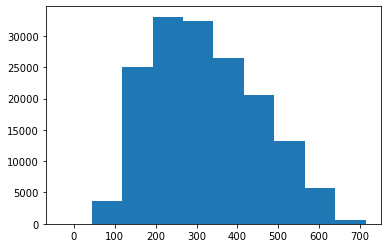

In [60]:
plt.hist(numbers)

In [87]:
sum(np.array(numbers)>419)

38961

In [68]:
scores = pd.DataFrame({'score': numbers})

In [74]:
scores['rank'] = scores['score'].rank(ascending = False)

In [75]:
scores.sort_values(by = 'score')

,score,rank
82582,-31,160682.0
44144,-25,160681.0
150352,-15,160679.5
96236,-15,160679.5
132932,-13,160678.0
...,...,...
84474,706,5.0
78649,709,4.0
47104,710,3.0
102929,712,2.0


In [76]:
scores[scores['score']==419]

,score,rank
685,419,39114.0
1319,419,39114.0
1607,419,39114.0
1759,419,39114.0
1860,419,39114.0
...,...,...
159492,419,39114.0
159900,419,39114.0
159924,419,39114.0
160246,419,39114.0


In [84]:
scores[scores['score']==560]

,score,rank
2128,560,6958.5
2988,560,6958.5
5243,560,6958.5
5817,560,6958.5
7398,560,6958.5
...,...,...
157780,560,6958.5
158501,560,6958.5
158839,560,6958.5
159100,560,6958.5


In [80]:
absent_count

11034

In [ ]:
18000 
